In [17]:
import paddleocr
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [18]:
# OCRエンジンを初期化します。デフォルトの言語は英語ですが、
# 他の言語を使用する場合は、引数に適切な言語コードを指定します。
# 例えば、日本語を使用する場合は 'japan' を指定します。
#NOTE:need to run only once to download and load model into memory
ocr = PaddleOCR(
    lang = "japan", #英語OCRならen
    use_gpu = False, #GPUを使う場合はTrue   
)

[2023/07/13 17:28:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/s.takabayashi/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/s.takabayashi/.paddleocr/whl/rec/japan/japan_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_

In [35]:
from typing import Any
def ocr_image(image_path: str) -> list:
    """
    画像からテキストを抽出します。

    :param image_path: OCRを実行する画像のパス
    :return: OCRの結果
    """
    # OCRを実行します。結果はテキストのリストとして返されます。
    # 各テキストは、その位置情報とともに返されます。
    result = ocr.ocr(image_path)
    return result

In [38]:
def display_ocr_result(img_path: str, result: list):
    """
    OCRの結果を表示します。
    :param img: OCRを実行した画像
    :param result: OCRの結果
    """
    r = result[0]

    for idx in range(len(result)):
        res = result[idx]
        for line in res:
            print(line[0])

    img: Image = Image.open(img_path).convert('RGB')
    

    #なぜか3列なので3列目は削除
    boxes  = [line[0][0:2] for line in r]
    txts   = [line[1][0] for line in r]
    scores = [line[1][1] for line in r]

    result_img = draw_ocr(img, boxes, txts, scores, font_path='/Library/Fonts/Arial Unicode.ttf')
    result_img = Image.fromarray(result_img)

    # matplotlibを使用して画像を表示します。
    plt.figure(figsize=(10, 10))
    plt.imshow(result_img)
    plt.show()

[2023/07/14 10:49:44] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/07/14 10:49:44] ppocr DEBUG: dt_boxes num : 111, elapse : 0.5170161724090576
[2023/07/14 10:49:53] ppocr DEBUG: rec_res num  : 111, elapse : 8.503787994384766
[[38.0, 23.0], [139.0, 23.0], [139.0, 46.0], [38.0, 46.0]]
[[239.0, 15.0], [511.0, 15.0], [511.0, 42.0], [239.0, 42.0]]
[[685.0, 17.0], [732.0, 17.0], [732.0, 32.0], [685.0, 32.0]]
[[20.0, 58.0], [67.0, 58.0], [67.0, 78.0], [20.0, 78.0]]
[[150.0, 62.0], [167.0, 62.0], [167.0, 75.0], [150.0, 75.0]]
[[293.0, 64.0], [303.0, 64.0], [303.0, 73.0], [293.0, 73.0]]
[[456.0, 62.0], [531.0, 62.0], [531.0, 77.0], [456.0, 77.0]]
[[18.0, 79.0], [83.0, 82.0], [82.0, 102.0], [18.0, 99.0]]
[[91.0, 82.0], [161.0, 82.0], [161.0, 100.0], [91.0, 100.0]]
[[62.0, 159.0], [114.0, 159.0], [114.0, 174.0], [62.0, 174.0]]
[[32.0, 185.0], [236.0, 185.0], [236.0, 207.0], [32.0, 207.0]]
[[52.0, 229.0], [122

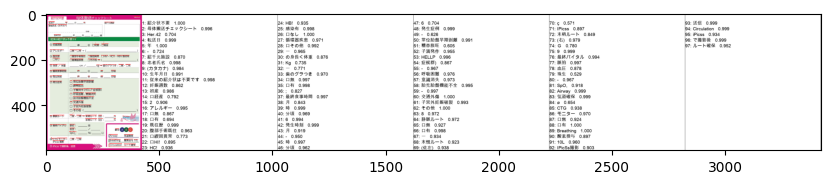

In [39]:
# OCRを実行する画像のパスを指定します。
image_path = '../sheet1.jpg'
result = ocr_image(image_path)
display_ocr_result(image_path, result)

In [ ]:
# coding: utf-8
from paddleocr import PaddleOCR
from PIL import Image, ImageEnhance, ImageFont, ImageDraw
import numpy as np
import cv2
from loguru import logger
# import logging ←バイバイ！

def japanese_puttext(img, text, position, font, fill = (255, 0, 0)):
    """ cv2.putTextが日本語対応してないので、自分で関数を定義する"""
    img_pil = Image.fromarray(img) # PIL Imageに変換。
    draw = ImageDraw.Draw(img_pil) # drawインスタンスを生成
    draw.text(position, text, font = font , fill = fill) # drawにテキストをのせる
    img = np.array(img_pil) # PILを配列に変換
    return img

def run_ocr(img_path):
    """ OCRメイン関数"""
    #画像読み込み＋前処理(適当)+PaddleOCR入力用にnpへ
    im = Image.open(img_path).convert('L')
    enhancer= ImageEnhance.Contrast(im) #コントラストを上げる
    im_con = enhancer.enhance(2.0) #コントラストを上げる
    np_img = np.asarray(im_con)
    logger.debug('画像読み込み完了') #logは今までと変わらない！

    #PaddleOCRを定義
    ocr = PaddleOCR(
        use_gpu=False, #GPUあるならTrue
        lang = "japan", #英語OCRならen
        det_limit_side_len=im_con.size[1], #画像サイズが960に圧縮されないように必須設定
        max_text_length = 30, #検証してないがテキスト最大長のパラメータ。今回は不要だが紹介
        )
    logger.debug('PaddleOCR設定完了')

    #PaddleOCRでOCR ※cls(傾き設定)は矩形全体での補正なので1文字1文字の補正ではない為不要
    result = ocr.ocr(img = np_img, det=True, rec=True, cls=False)
    logger.debug('PaddleOCR実行完了')

    #OCR結果転記用
    result_img = np_img.copy()
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    #画像に載せる日本語フォント設定　★Windows10だと C:\Windows\Fonts\以下にフォントがありまｓ
    # Macでは、システムのフォントは通常 /Library/Fonts/ に格納されています。
    fontpath = '/Library/Fonts/Arial Unicode.ttf'

    font = ImageFont.truetype(fontpath, 10) #サイズ指定

    #OCR結果を画像に転記
    for detection in result[0]:
        t_left = tuple([int(i) for i in detection[0][0]]) #左上
        # t_right = tuple([int(i) for i in detection[0][1]]) #右上
        b_right = tuple([int(i) for i in detection[0][2]]) #右下
        b_left = tuple([int(i) for i in detection[0][3]]) #左下
        ocr_text = detection[1][0] #テキスト(detection[1][1]なら自信度取得も可能)
        #画像に文字範囲の矩形を載せる(緑色)
        result_img = cv2.rectangle(result_img, t_left, b_right, (0, 255, 0), 3)
        """putTextだと日本語が??になってしまうので自作関数で処理。文字の位置は左下とした"""
        # result_img = cv2.putText(result_img, ocr_text, t_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)
        result_img = japanese_puttext(result_img, ocr_text, (b_left[0], b_left[1]), font)

    logger.debug('画像にOCR結果記載完了')
    #保存する
    result_img = cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('../out/ocr_result_picture.png', result_img)
    logger.debug('結果画像の保存完了')

if __name__ == '__main__':
    # loggerを定義
    logger.add("../out/samplelog.log", format="[{time:HH.mm:ss}] <lvl>{message}</lvl>", level='DEBUG', enqueue=True)
    img_path = "../sheet1.jpg"
    run_ocr(img_path)
    # loggerを終了
    logger.remove()
